In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#SSP-Kroupa_MU300

In [3]:
data = pd.read_csv('mariela_2.dat', delim_whitespace=True)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1397070 entries, 0 to 1397069
Data columns (total 41 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   Hab        1397070 non-null  float64
 1   O3         1397070 non-null  float64
 2   N2         1397070 non-null  float64
 3   O2         1397070 non-null  float64
 4   O3_4363    1397070 non-null  float64
 5   N2_5755    1397070 non-null  float64
 6   Ne3        1397070 non-null  float64
 7   Ar3        1397070 non-null  float64
 8   S2         1397070 non-null  float64
 9   rS2        1397070 non-null  float64
 10  S3_6312    1397070 non-null  float64
 11  S3         1397070 non-null  float64
 12  Ar4        1397070 non-null  float64
 13  Ar4_7170   1397070 non-null  float64
 14  O1         1397070 non-null  float64
 15  O3_88      1397070 non-null  float64
 16  O4_25      1397070 non-null  float64
 17  Ne2_12     1397070 non-null  float64
 18  Ne3_15     1397070 non-null  float64
 19  

In [5]:
data.head()

,Hab,O3,N2,O2,O3_4363,N2_5755,Ne3,Ar3,S2,rS2,...,HbFrac,logU_init,age,OH_tot,Z,Z_tot,dNO,CO,ksi_d,atm_file
0,2.887625,1.189126,0.000162,0.033601,0.052446,5.067502e-06,0.119360,0.003713,0.006011,1.419833,...,1.000000,-1.5,1000000.0,-5.06,0.000111,0.000166,-0.5,-1.0,0.36,CB19_SSP_kroup_MU300.mod
1,2.747224,1.875377,0.000005,0.005716,0.103504,3.745953e-07,0.195821,0.001829,0.000256,1.387530,...,0.161975,-1.5,1000000.0,-5.06,0.000111,0.000166,-0.5,-1.0,0.36,CB19_SSP_kroup_MU300.mod
2,2.781690,1.761352,0.000006,0.006406,0.092403,4.569471e-07,0.181583,0.002145,0.000349,1.390895,...,0.331815,-1.5,1000000.0,-5.06,0.000111,0.000166,-0.5,-1.0,0.36,CB19_SSP_kroup_MU300.mod
3,2.804412,1.624226,0.000008,0.007163,0.081065,5.411720e-07,0.165481,0.002444,0.000469,1.394500,...,0.494720,-1.5,1000000.0,-5.06,0.000111,0.000166,-0.5,-1.0,0.36,CB19_SSP_kroup_MU300.mod
4,2.824856,1.500103,0.000010,0.008284,0.071674,6.627895e-07,0.151315,0.002767,0.000654,1.398212,...,0.644049,-1.5,1000000.0,-5.06,0.000111,0.000166,-0.5,-1.0,0.36,CB19_SSP_kroup_MU300.mod


In [6]:
stellar_lib = data['atm_file']

In [7]:
stellar_lib.unique()

array(['CB19_SSP_kroup_MU300.mod', 'CB19_SSP_kroup_MU100.mod',
       'CB19_CSF_kroup_MU300.mod', 'CB19_CSF_kroup_MU600.mod',
       'CB19_CSF_kroup_MUX.mod'], dtype=object)

In [8]:
#CALCULATING THE MIR, OPT, AND FIR RATIOS
data["xmir"] = data["O4_25"]/data["Ne3_15"]
data["ymir"] = data["Ne3_15"]/data["Ne2_12"]
data["xopt"] = data["N2"]/data["Hab"]
data["yopt"] = data["O3"]
data["xfir"] = data["O4_25"]/data["O3_88"]

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1397070 entries, 0 to 1397069
Data columns (total 46 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   Hab        1397070 non-null  float64
 1   O3         1397070 non-null  float64
 2   N2         1397070 non-null  float64
 3   O2         1397070 non-null  float64
 4   O3_4363    1397070 non-null  float64
 5   N2_5755    1397070 non-null  float64
 6   Ne3        1397070 non-null  float64
 7   Ar3        1397070 non-null  float64
 8   S2         1397070 non-null  float64
 9   rS2        1397070 non-null  float64
 10  S3_6312    1397070 non-null  float64
 11  S3         1397070 non-null  float64
 12  Ar4        1397070 non-null  float64
 13  Ar4_7170   1397070 non-null  float64
 14  O1         1397070 non-null  float64
 15  O3_88      1397070 non-null  float64
 16  O4_25      1397070 non-null  float64
 17  Ne2_12     1397070 non-null  float64
 18  Ne3_15     1397070 non-null  float64
 19  

In [10]:
#plot limits
x0=(1,1)
y0=(1,1)
y1=(0.01,100)
x1=(0.01,100)

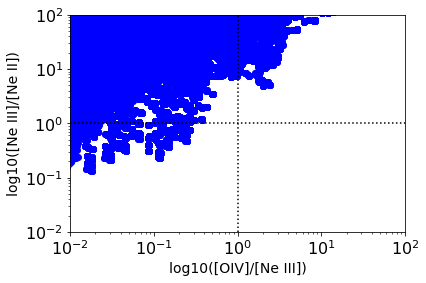

In [11]:
#A FAST LOOK OF MIR RATIOS
plt.plot(data["xmir"],data["ymir"],'o', color='blue')
plt.xscale('log')
plt.yscale('log')
plt.xlabel("log10([OIV]/[Ne III])", fontsize=14)
plt.ylabel("log10([Ne III]/[Ne II])", fontsize=14)
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16)
plt.xlim(0.01, 100)
plt.ylim(0.01, 100)
plt.plot(x0,y1,'k:')
plt.plot(x1,y0,'k:')

In [12]:
#I SELECT MIR, OPT, AND FIR RATIOS BETWEEN 10^-2 AND 10^2

In [13]:
data = data[(data['xmir']>0.01) & (data['xmir']<100)]
data = data[(data['ymir']>0.01) & (data['ymir']<100)]
#data = data[(data['xfir']>0.01) & (data['xfir']<100)]
#data = data[(data['ymir']>0.01) & (data['ymir']<100)]
#data = data[(data['xopt']>0.01) & (data['xopt']<100)]
#data = data[(data['yopt']>0.01) & (data['yopt']<100)]
#LATER YOU WILL SEE THAT WE END WITH 82026 MODELS

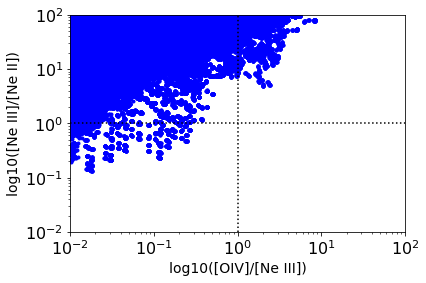

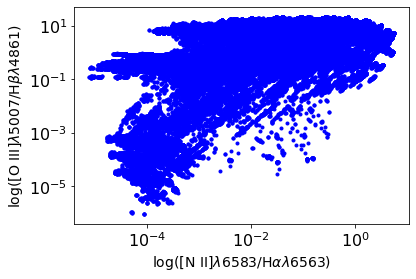

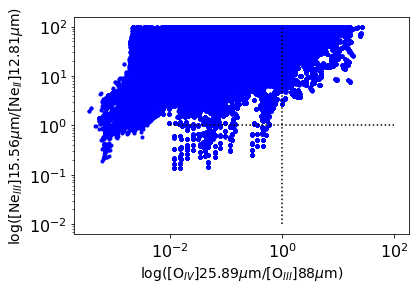

In [14]:
#fig = plt.figure()
#fig.subplots_adjust(hspace=0.4, wspace=3)
#plt.subplot(131)
plt.figure()
plt.plot(data["xmir"],data["ymir"],'.', color='blue')
plt.xscale('log')
plt.yscale('log')
plt.xlabel("log10([OIV]/[Ne III])", fontsize=14)
plt.ylabel("log10([Ne III]/[Ne II])", fontsize=14)
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16)
plt.xlim(0.01, 100)
plt.ylim(0.01, 100)
plt.plot(x0,y1,'k:')
plt.plot(x1,y0,'k:')
#plt.subplot(132)
plt.figure()
plt.plot(data["xopt"],data["yopt"],'.', color='blue')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r"log([N II]$\lambda6583$/H$\alpha\lambda6563$)", fontsize=14)
plt.ylabel(r"log([O III]$\lambda5007$/H$\beta\lambda4861$)", fontsize=14)
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16)
#plt.subplot(133)
plt.figure()
plt.plot(data["xfir"],data["ymir"],'.', color='blue')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r"log([O$_{IV}$]25.89$\mu$m/[O$_{III}$]88$\mu$m)", fontsize=14)
plt.ylabel(r"log([Ne$_{III}$]15.56$\mu$m/[Ne$_{II}$]12.81$\mu$m)", fontsize=14)
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16)


plt.plot(x0,y1,'k:')
plt.plot(x1,y0,'k:')

In [15]:
###CALCULAR NH
data['NH'] = np.log10(data['nH_mean']*data['thickness'])
data['NH'].unique()

array([21.17640871, 19.81770319, 20.43864811, ..., 18.83022899,
       18.70117083, 18.70108442])

In [16]:
CB19_CSF_kroup_MU300 = data[(data['atm_file']=='CB19_CSF_kroup_MU300.mod')]
CB19_CSF_kroup_MU100 = data[(data['atm_file']=='CB19_CSF_kroup_MUX.mod')]
CB19_SSP_kroup_MU300 = data[(data['atm_file']=='CB19_SSP_kroup_MU300.mod')]
CB19_SSP_kroup_MU100 = data[(data['atm_file']=='CB19_SSP_kroup_MU100.mod')]
#FALTA INCLUIR LOS MODELOS CON x030

In [ ]:
#xmir

(500000.0, 50000000000.0)

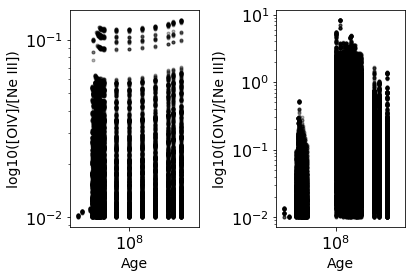

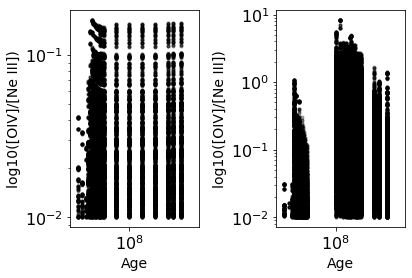

In [17]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4,wspace=0.6)
plt.subplot(121)
plt.plot(CB19_CSF_kroup_MU100["age"],CB19_CSF_kroup_MU100["xmir"],'.', color='black', alpha=0.3)
plt.xscale('log')
plt.yscale('log')
plt.ylabel("log10([OIV]/[Ne III])", fontsize=14)
plt.xlabel("Age", fontsize=14)
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16)
plt.xlim(5e5, 5e10)

plt.subplot(122)
plt.plot(CB19_SSP_kroup_MU100["age"],CB19_SSP_kroup_MU100["xmir"],'.', color='black', alpha=0.3)
plt.xscale('log')
plt.yscale('log')
plt.ylabel("log10([OIV]/[Ne III])", fontsize=14)
plt.xlabel("Age", fontsize=14)
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16)
plt.xlim(5e5, 5e10)


fig = plt.figure()
fig.subplots_adjust(hspace=0.4,wspace=0.6)
plt.subplot(121)
plt.plot(CB19_CSF_kroup_MU300["age"],CB19_CSF_kroup_MU300["xmir"],'.', color='black', alpha=0.3)
plt.xscale('log')
plt.yscale('log')
plt.ylabel("log10([OIV]/[Ne III])", fontsize=14)
plt.xlabel("Age", fontsize=14)
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16)
plt.xlim(5e5, 5e10)

plt.subplot(122)
plt.plot(CB19_SSP_kroup_MU300["age"],CB19_SSP_kroup_MU300["xmir"],'.', color='black', alpha=0.3)
plt.xscale('log')
plt.yscale('log')
plt.ylabel("log10([OIV]/[Ne III])", fontsize=14)
plt.xlabel("Age", fontsize=14)
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16)
plt.xlim(5e5, 5e10)

In [18]:
#CB19_CSF_kroup_MU100.count() # 21399 models
#CB19_CSF_kroup_MU300.count() # 28609 models
#CB19_SSP_kroup_MU100.count() # 109066 models
#CB19_SSP_kroup_MU300.count()  # 112551 models
#All stellar libraries produce nearly the same amount of models. However, it is possible to see that 
#when an Mup=300 Mo is assumed new models with ratios between 2x10-1>log([OIV]/[Ne II])>5x10-1, 
#as weel as, models with ages around 5x10^6year and ratios of log([OIV]/[Ne III])~1.

In [ ]:
#ymir

(500000.0, 50000000000.0)

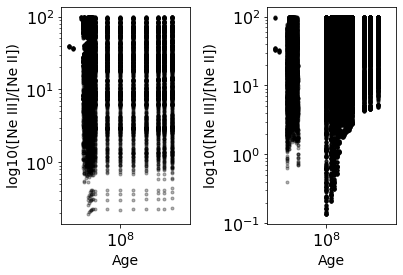

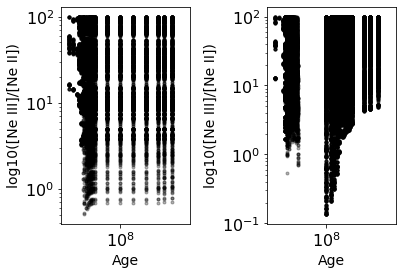

In [19]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4,wspace=0.6)
plt.subplot(121)
plt.plot(CB19_CSF_kroup_MU100["age"],CB19_CSF_kroup_MU100["ymir"],'.', color='black', alpha=0.3)
plt.xscale('log')
plt.yscale('log')
plt.ylabel("log10([Ne III]/[Ne II])", fontsize=14)
plt.xlabel("Age", fontsize=14)
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16)
plt.xlim(5e5, 5e10)

plt.subplot(122)
plt.plot(CB19_SSP_kroup_MU100["age"],CB19_SSP_kroup_MU100["ymir"],'.', color='black', alpha=0.3)
plt.xscale('log')
plt.yscale('log')
plt.ylabel("log10([Ne III]/[Ne II])", fontsize=14)
plt.xlabel("Age", fontsize=14)
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16)
plt.xlim(5e5, 5e10)


fig = plt.figure()
fig.subplots_adjust(hspace=0.4,wspace=0.6)
plt.subplot(121)
plt.plot(CB19_CSF_kroup_MU300["age"],CB19_CSF_kroup_MU300["ymir"],'.', color='black', alpha=0.3)
plt.xscale('log')
plt.yscale('log')
plt.ylabel("log10([Ne III]/[Ne II])", fontsize=14)
plt.xlabel("Age", fontsize=14)
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16)
plt.xlim(5e5, 5e10)

plt.subplot(122)
plt.plot(CB19_SSP_kroup_MU300["age"],CB19_SSP_kroup_MU300["ymir"],'.', color='black', alpha=0.3)
plt.xscale('log')
plt.yscale('log')
plt.ylabel("log10([Ne III]/[Ne II])", fontsize=14)
plt.xlabel("Age", fontsize=14)
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16)
plt.xlim(5e5, 5e10)

In [20]:
#For the ratio log([NeIII]/[Ne II]) few new models are produced around 1e6 years when Mup = 300Mo

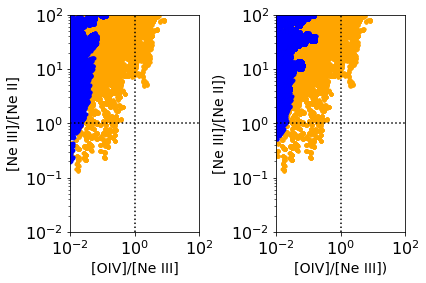

In [21]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4,wspace=0.6)
plt.subplot(121)
plt.plot(CB19_SSP_kroup_MU100["xmir"],CB19_SSP_kroup_MU100["ymir"],'.', color='orange')
plt.plot(CB19_CSF_kroup_MU100["xmir"],CB19_CSF_kroup_MU100["ymir"],'.', color='blue')
plt.xscale('log')
plt.yscale('log')
plt.xlabel("[OIV]/[Ne III]", fontsize=14)
plt.ylabel("[Ne III]/[Ne II]", fontsize=14)
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16)
plt.xlim(0.01, 100)
plt.ylim(0.01, 100)
plt.plot(x0,y1,'k:')
plt.plot(x1,y0,'k:')

plt.subplot(122)
plt.plot(CB19_SSP_kroup_MU300["xmir"],CB19_SSP_kroup_MU300["ymir"],'.', color='orange')
plt.plot(CB19_CSF_kroup_MU300["xmir"],CB19_CSF_kroup_MU300["ymir"],'.', color='blue')
plt.xscale('log')
plt.yscale('log')
plt.xlabel("[OIV]/[Ne III])", fontsize=14)
plt.ylabel("[Ne III]/[Ne II])", fontsize=14)
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16)
plt.xlim(0.01, 100)
plt.ylim(0.01, 100)
plt.plot(x0,y1,'k:')
plt.plot(x1,y0,'k:')

In [22]:
#Hay que considerar que a partir de un modelo dado, se puede obtener las 
#mismas razones de lineas cambiando Q0 por un factor F y los tamaños por un factor sqr(F). 
#Obtienes el mismo logU y entonces el mismo modelo. 
#Así que la densidad columnar no es un parámetro que se debe considerar solo.

In [23]:
CB19_SSP_kroup_MU100['logQ'].unique()

array([50.478, 51.478, 52.478, 53.478, 48.978, 50.978, 49.978, 51.978,
       47.478, 48.478, 49.478, 47.978, 45.978, 46.978, 45.478, 46.478,
       44.478, 44.978, 43.978])

In [24]:
CB19_SSP_kroup_MU100['thickness'].unique()

array([1.47719746e+17, 6.28734560e+15, 2.59927456e+16, ...,
       1.10239499e+20, 1.61318920e+19, 1.28829487e+19])

In [25]:
CB19_SSP_kroup_MU100['logQ']

372054     50.478
372055     50.478
372056     50.478
372057     50.478
372058     50.478
            ...  
690277     43.978
690295     45.978
1179882    53.478
1181790    52.478
1397046    52.478
Name: logQ, Length: 109066, dtype: float64

In [26]:
CB19_SSP_kroup_MU100['thickness']

372054     1.477197e+17
372055     6.287346e+15
372056     2.599275e+16
372057     5.065275e+16
372058     8.157975e+16
               ...     
690277     2.021341e+15
690295     2.053674e+17
1179882    1.102395e+20
1181790    1.613189e+19
1397046    1.288295e+19
Name: thickness, Length: 109066, dtype: float64

In [27]:
CB19_SSP_kroup_MU100['NH'] 

372054     21.169439
372055     19.798467
372056     20.414852
372057     20.704603
372058     20.911582
             ...    
690277     18.305640
690295     18.312531
1179882    21.042337
1181790    21.207685
1397046    21.110015
Name: NH, Length: 109066, dtype: float64

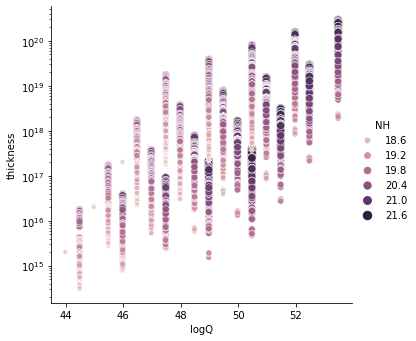

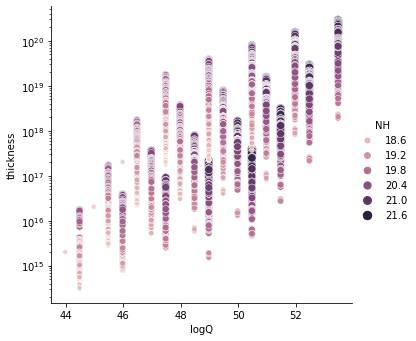

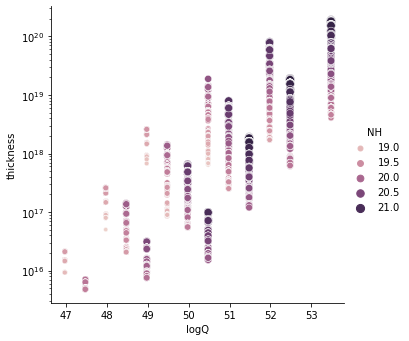

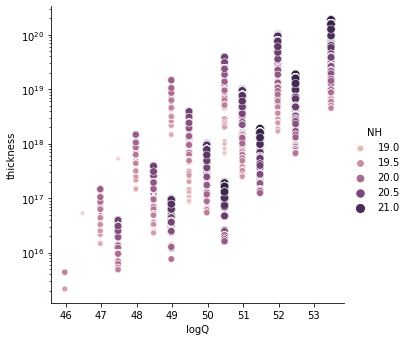

In [36]:
p1=sns.relplot(x='logQ', y='thickness', data=CB19_SSP_kroup_MU100,kind="scatter", hue='NH', size='NH')
p1.set(yscale="log")
p2=sns.relplot(x='logQ', y='thickness', data=CB19_SSP_kroup_MU300,kind="scatter", hue='NH', size='NH')
p2.set(yscale="log")
p3=sns.relplot(x='logQ', y='thickness', data=CB19_CSF_kroup_MU100,kind="scatter", hue='NH', size='NH')
p3.set(yscale="log")
p4=sns.relplot(x='logQ', y='thickness', data=CB19_CSF_kroup_MU300,kind="scatter", hue='NH', size='NH')
p4.set(yscale="log")
#xlabel= number of ionizing photons emitted by the central object (s^-1)

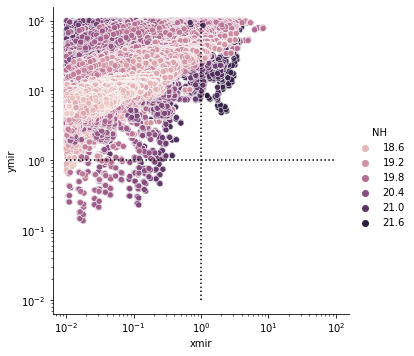

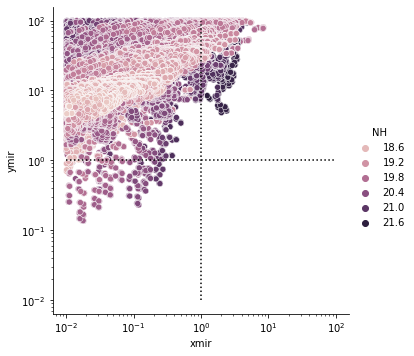

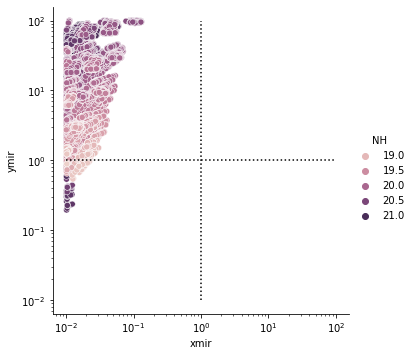

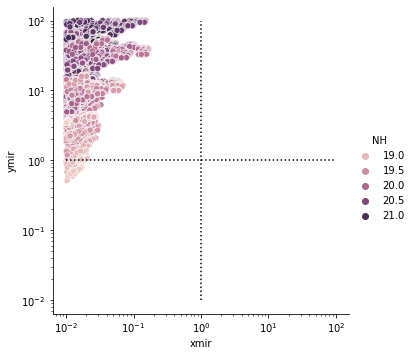

In [29]:
grid1 = sns.relplot(x='xmir', y='ymir', data=CB19_SSP_kroup_MU100,kind="scatter", hue='NH')
grid1.set(xscale="log",yscale="log")
plt.plot(x0,y1,'k:')
plt.plot(x1,y0,'k:')

grid2=sns.relplot(x='xmir', y='ymir', data=CB19_SSP_kroup_MU300,kind="scatter", hue='NH')
grid2.set(xscale="log",yscale="log")
plt.plot(x0,y1,'k:')
plt.plot(x1,y0,'k:')

grid3=sns.relplot(x='xmir', y='ymir', data=CB19_CSF_kroup_MU100,kind="scatter", hue='NH')
grid3.set(xscale="log",yscale="log")
plt.plot(x0,y1,'k:')
plt.plot(x1,y0,'k:')

grid4=sns.relplot(x='xmir', y='ymir', data=CB19_CSF_kroup_MU300,kind="scatter", hue='NH')
grid4.set(xscale="log",yscale="log")
plt.plot(x0,y1,'k:')
plt.plot(x1,y0,'k:')
#xlabel= number of ionizing photons emitted by the central object (s^-1)

In [30]:
CB19_CSF_kroup_MU100['HbFrac'].unique()

array([1.        , 1.        , 1.        , ..., 0.12832142, 0.13484351,
       0.13462012])

In [31]:
#RADIATION BOUNDED MODELS
RB_CB19_CSF_kroup_MU100 = CB19_CSF_kroup_MU100[CB19_CSF_kroup_MU100['HbFrac']==1]
RB_CB19_CSF_kroup_MU300 = CB19_CSF_kroup_MU300[CB19_CSF_kroup_MU300['HbFrac']==1]
RB_CB19_SSP_kroup_MU100 = CB19_SSP_kroup_MU100[CB19_SSP_kroup_MU100['HbFrac']==1]
RB_CB19_SSP_kroup_MU300 = CB19_SSP_kroup_MU300[CB19_SSP_kroup_MU300['HbFrac']==1]

#MATTER BOUNDED MODELS
MB_CB19_CSF_kroup_MU100 = CB19_CSF_kroup_MU100[CB19_CSF_kroup_MU100['HbFrac']<0.9]
MB_CB19_CSF_kroup_MU300 = CB19_CSF_kroup_MU300[CB19_CSF_kroup_MU300['HbFrac']<0.9]
MB_CB19_SSP_kroup_MU100 = CB19_SSP_kroup_MU100[CB19_SSP_kroup_MU100['HbFrac']<0.9]
MB_CB19_SSP_kroup_MU300 = CB19_SSP_kroup_MU300[CB19_SSP_kroup_MU300['HbFrac']<0.9]

In [32]:
MB_CB19_CSF_kroup_MU100['HbFrac'].unique()

array([0.31027431, 0.45652103, 0.64200736, ..., 0.12832142, 0.13484351,
       0.13462012])

In [33]:
RB_CB19_CSF_kroup_MU100['HbFrac'].unique()

array([1.])

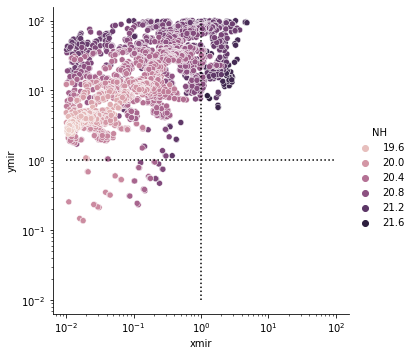

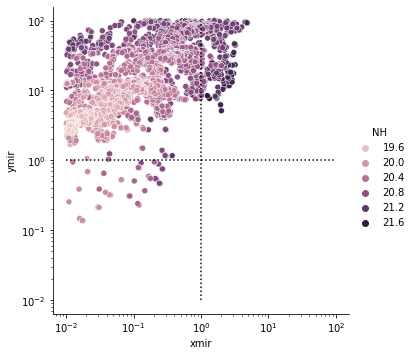

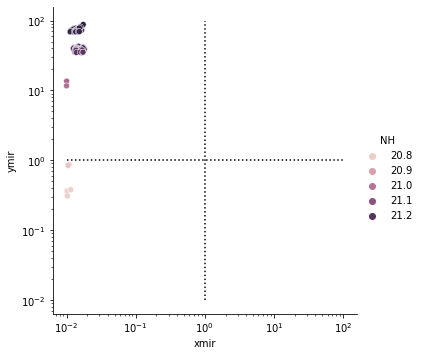

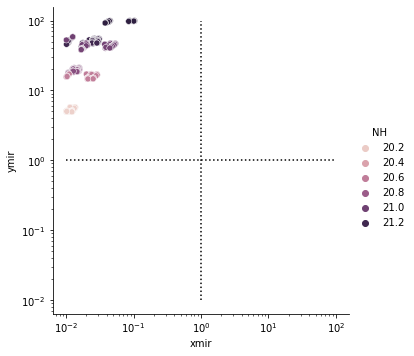

In [34]:
grid1 = sns.relplot(x='xmir', y='ymir', data=RB_CB19_SSP_kroup_MU100,kind="scatter", hue='NH')
grid1.set(xscale="log",yscale="log")
plt.plot(x0,y1,'k:')
plt.plot(x1,y0,'k:')

grid2=sns.relplot(x='xmir', y='ymir', data=RB_CB19_SSP_kroup_MU300,kind="scatter", hue='NH')
grid2.set(xscale="log",yscale="log")
plt.plot(x0,y1,'k:')
plt.plot(x1,y0,'k:')

grid3=sns.relplot(x='xmir', y='ymir', data=RB_CB19_CSF_kroup_MU100,kind="scatter", hue='NH')
grid3.set(xscale="log",yscale="log")
plt.plot(x0,y1,'k:')
plt.plot(x1,y0,'k:')

grid4=sns.relplot(x='xmir', y='ymir', data=RB_CB19_CSF_kroup_MU300,kind="scatter", hue='NH')
grid4.set(xscale="log",yscale="log")
plt.plot(x0,y1,'k:')
plt.plot(x1,y0,'k:')

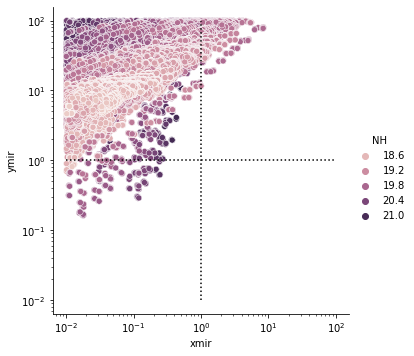

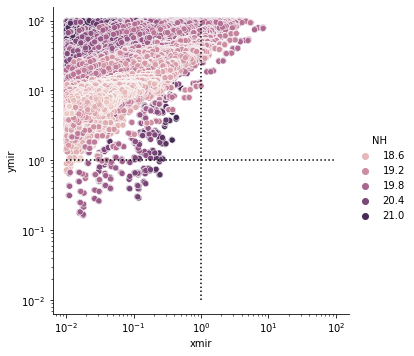

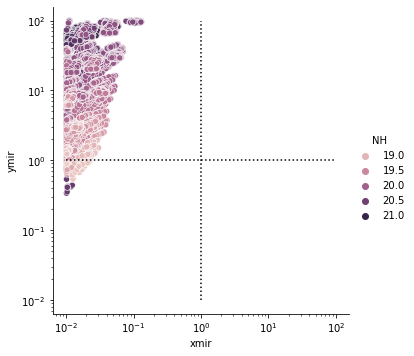

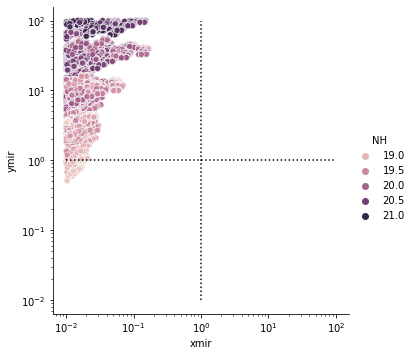

In [35]:
grid1 = sns.relplot(x='xmir', y='ymir', data=MB_CB19_SSP_kroup_MU100,kind="scatter", hue='NH')
grid1.set(xscale="log",yscale="log")
plt.plot(x0,y1,'k:')
plt.plot(x1,y0,'k:')

grid2=sns.relplot(x='xmir', y='ymir', data=MB_CB19_SSP_kroup_MU300,kind="scatter", hue='NH')
grid2.set(xscale="log",yscale="log")
plt.plot(x0,y1,'k:')
plt.plot(x1,y0,'k:')

grid3=sns.relplot(x='xmir', y='ymir', data=MB_CB19_CSF_kroup_MU100,kind="scatter", hue='NH')
grid3.set(xscale="log",yscale="log")
plt.plot(x0,y1,'k:')
plt.plot(x1,y0,'k:')

grid4=sns.relplot(x='xmir', y='ymir', data=MB_CB19_CSF_kroup_MU300,kind="scatter", hue='NH')
grid4.set(xscale="log",yscale="log")
plt.plot(x0,y1,'k:')
plt.plot(x1,y0,'k:')

In [ ]:
# There is not significative differences between the grid of models obtained by assuming 
#a like-Kroupa IMF with Mup 100 and 300 Mo. Therefore, I will continue the analysis using the grid of models 
#obtained by assuming a Kroupa IMF with Mup=100Mo and an SSP star forming law. Since, the latter, is 
#responsible for the models with the lowest ymir ratios and highest xmir ratios.